Confusion Matrix:
[[117  51]
 [ 15  47]]
Precision: 0.48
Recall: 0.76
Accuracy: 0.71


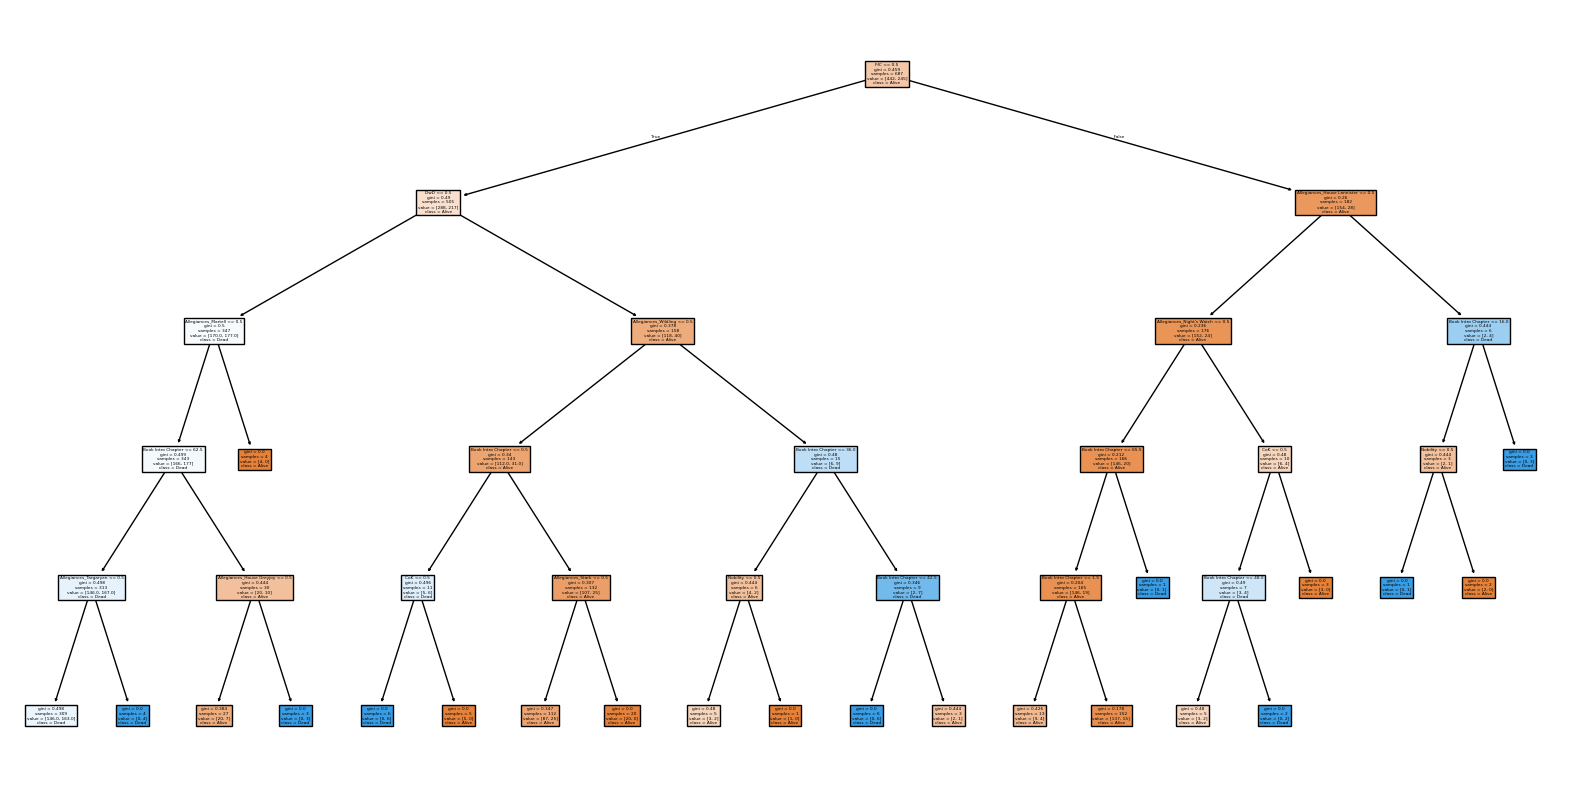

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# 1. 讀取資料
data = pd.read_csv('character-deaths.csv')

# 2. 資料前處理

# 2.1 將空值替換為0
data.fillna({'Death Year': 0, 'Book of Death': 0, 'Death Chapter': 0}, inplace=True)

# 2.2 取其中一個欄位作為預測目標，這裡以 'Book of Death' 為例，轉換成 0 或 1
data['Death'] = data['Book of Death'].apply(lambda x: 1 if x > 0 else 0)

# 2.3 將 Allegiances 轉成 dummy 特徵
data = pd.get_dummies(data, columns=['Allegiances'])

# 2.4 拆成訓練集與測試集
X = data.drop(['Death', 'Name', 'Death Year', 'Book of Death', 'Death Chapter'], axis=1)  # Features
y = data['Death']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. 使用 DecisionTreeClassifier 進行預測
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# 4. 預測並計算 Confusion Matrix、Precision、Recall、Accuracy
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# 5. 產出決策樹的圖
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Alive', 'Dead'])
plt.show()
